In [5]:
import numpy as np
from scipy import stats

## Задача 1

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

====================================================================================================================

Итак, поскольку нам известно СКО, то в принципе мы можем воспользоваться формулой для Z оценки  
Воспользуемся формулой с википедии  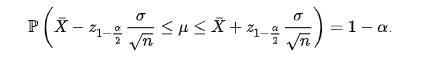  в лекции насколько я помню формула была без минусов, но тут в принципе это логично, потому что распределение симметрично. Плюс с обоих сторон вычитается квантиль 1-альфа/2

In [6]:
z_score = stats.norm.ppf(1 - 0.05 / 2)

In [8]:
lower_confidence = 80 - z_score * 16 / (256 ** 0.5)
upper_confidence = 80 + z_score * 16 / (256 ** 0.5)

In [10]:
print(f"Нижняя граница доверительного интервала равна '{lower_confidence:.5f}'")
print(f"Верхняя граница доверительного интервала равна '{upper_confidence:.5f}'")

Нижняя граница доверительного интервала равна '78.04004'
Верхняя граница доверительного интервала равна '81.95996'


====================================================================================================================

## Задача 2

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

======================================================================================================================

Итак, нам дана выборка 10 пачек и нам надо проверить является ли среднее значение их веса 200 граммам. Точнее надо понять значимо ли отличается среднее значение выборки от среднего значения генеральной совокупности в 200 грамм.  Нулевая гипотеза представляет собой утверждение что среднее значение выбранных пачек не отличается от 200 г.....и даже если оно отличается, то скорее всего мы допускаем ошибку первого рода...  Для того чтобы оперировать на таких минимальных выборках воспользуемся t критерием.  Оценим среднее и СКО выборки

In [17]:
sample = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
average = sample.mean()
stand_deviation = sample.std(ddof=1)

Значение нашего t теста равно

In [18]:
t_sample = (average - 200) / (stand_deviation / (sample.shape[0] ** 0.5))
t_sample

-1.0651074037450896

Теперь надо посчитать границы критического интервала. Наш критерий распределен в соответсвии с распределением стьюдента с 9 степенями свободы. Поскольку вес пачки может отличаться и в большую и в меньшую сторону, то оценка теста должна быть и слева и справа. Поэтому рассчитаем значение распределения по квантилю 0.5% и 99.5% и сравним с полученной статистикой

In [29]:
lower_t_sample = stats.t(df=sample.shape[0]-1).ppf(0.005)
higher_t_sample = stats.t(df=sample.shape[0]-1).ppf(0.995)

In [23]:
lower_t_sample < t_sample < higher_t_sample

True

Таким образом на текущей выборке мы можем утверждать, что средний вес пачки печенья не отличается значимо от 200г. Однако стоит заметить, что в распределении Стьюдента с минимальными степенями свободы сам график распределения более пологий и концы его более крутые. Что собственно и дает широкий критический интервал, поэтому тест показал что можно принять нулевую гипотезу. В случае увеличения выборки, скорее всего нулевую гипотезу придется отвергнуть. 

Р значение в данном случае равно как слева так и справа, потому что распределение симметрично и равняется

In [27]:
higher_t_sample

3.2498355440153697

In [30]:
higher_t_sample == - lower_t_sample

True

попробую портестировать свое предположение о увеличении колчества выборки)) Задам выборку из 100 элементов в границах от 190 до 204 - это максимальные и минимальные значения из выборки из задача

In [33]:
sample_2 = np.random.randint(190, 205, 100)
average_2 = sample_2.mean()
stand_deviation_2 = sample_2.std(ddof=1)

In [34]:
t_sample_2 = (average_2 - 200) / (stand_deviation_2 / (sample_2.shape[0] ** 0.5))

In [35]:
lower_t_sample < t_sample_2 < higher_t_sample

False

Собственно что и требовалось доказать))....еще один аргумент в пользу того что чем больше выборка тем лучше. Другими словами если реально нужно оценивать что-то нf маленькой выборке, то необходимо взвешенно подходить к оценке уровня значимости. 

## Задача 3

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

===================================================================================================================

Оценим необходимые параметры по выборке

In [37]:
bearing_samples = np.array( [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 
                             1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 
                             1.0865, 1.02 ])

In [38]:
bearing_variance = bearing_samples.var(ddof=1)
bearing_chi = (bearing_samples.shape[0] - 1) * bearing_variance / 0.0625

Вообще насколько я знаю форма распределения хи-квадрат зависит от количества степеней свободы....и оно не симметрично как распределение стьюдента или нормальное, поэтому наш уровень критической границы будет только правосторонним. С другой стороны можно посмортеть на расчет нашей статистики и увидеть, что она может изменяться только от нуля....ну и до бесконечности, поэтому надо тестить только правосторонние гипотезы. Поэтому надо посчитать 95% квантиль распределения и сравнить нашу статистику с квантильной

In [41]:
chi_statistic = stats.chi2(df=bearing_samples.shape[0] - 1).ppf(0.95)

In [42]:
bearing_chi >= chi_statistic

False

Нет, значение нашей статистики меньше критического уровня. Таким образом дисперсия случайной велечины равна 0.0625. Принимаем нулевую гипотезу.